In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import os

In [4]:
# Define the path to your local dataset
base_dir = "D:\\sk sir\\lab\\flowers"  # Change this to your local dataset path


In [5]:
# Initialize the ImageDataGenerator with a validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Use 20% for testing/validation

# Load training data (80%)
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),  # Resize images
    batch_size=32,
    class_mode='categorical',  # Use 'binary' for binary classification
    subset='training'  # Load the training data (80% of the images)
)

# Load validation data (20%)
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),  # Resize images
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Load the validation data (20% of the images)
)


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [6]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained MobileNetV2 model without the top classification layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's layers to prevent them from being updated during training
base_model.trainable = False

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Create the full model by combining the base model and the new classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with an optimizer, loss function, and metrics for evaluation
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data, using the test data for evaluation
model.fit(train_generator, validation_data=validation_generator, epochs=20)

Epoch 1/20


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


109/109 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.7284 - loss: 0.8499 - val_accuracy: 0.8081 - val_loss: 0.5537
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - accuracy: 0.9245 - loss: 0.2386 - val_accuracy: 0.8651 - val_loss: 0.3733
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.9579 - loss: 0.1289 - val_accuracy: 0.8721 - val_loss: 0.4066
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.9802 - loss: 0.0760 - val_accuracy: 0.8674 - val_loss: 0.4334
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.9898 - loss: 0.0443 - val_accuracy: 0.8616 - val_loss: 0.4748
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 292s 3s/step - accuracy: 0.9958 - loss: 0.0266 - val_accuracy: 0.8779 - val_loss: 0.4273
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.9989 - loss: 0.0098 - val_accuracy: 0.8721 - val_loss: 0.4630
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 105s 943ms/step - accuracy: 0.9981 - loss: 0.0126 - val_accuracy: 0.

In [23]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(validation_generator)
print(f'Test Accuracy: {accuracy:.2f}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 340ms/step - accuracy: 0.8456 - loss: 0.7469
Test Accuracy: 0.86


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step


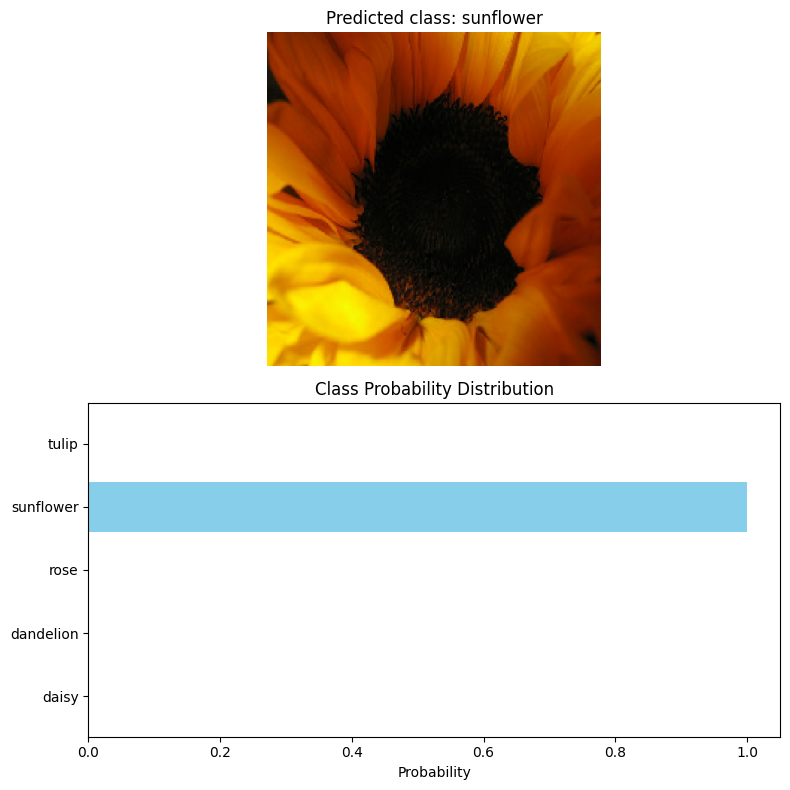

Top Predictions:
sunflower: 100.00%
daisy: 0.00%
dandelion: 0.00%


In [10]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Assuming you have already defined `model`, `train_generator`, and `img_size` 
img_size = (224, 224)  # Update this according to your model

def predict_flower_from_upload():
    # Hide the root window and open file dialog
    Tk().withdraw()
    img_path = askopenfilename(title="Select an Image", filetypes=[("Image Files", "*.jpg;*.jpeg;*.png")])

    if img_path:  # Check if a file was selected
        # Load and preprocess the image
        img = image.load_img(img_path, target_size=img_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize image data

        # Predict the class using the trained model
        predictions = model.predict(img_array)
        class_idx = np.argmax(predictions)
        class_label = list(train_generator.class_indices.keys())[class_idx]

        # Plot the uploaded image
        plt.figure(figsize=(8, 8))
        plt.subplot(2, 1, 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Predicted class: {class_label}')

        # Display the probability distribution
        plt.subplot(2, 1, 2)
        y_pos = np.arange(len(train_generator.class_indices))
        class_labels = list(train_generator.class_indices.keys())
        probabilities = predictions[0]

        plt.barh(y_pos, probabilities, align='center', color='skyblue')
        plt.yticks(y_pos, class_labels)
        plt.xlabel('Probability')
        plt.title('Class Probability Distribution')

        plt.tight_layout()
        plt.show()

        # Display top-N predictions
        top_n = 3  # Number of top predictions to display
        top_indices = np.argsort(probabilities)[-top_n:][::-1]
        top_labels = [class_labels[i] for i in top_indices]
        top_probs = probabilities[top_indices]

        print("Top Predictions:")
        for i in range(top_n):
            print(f"{top_labels[i]}: {top_probs[i] * 100:.2f}%")
    else:
        print("No file selected.")

# Call the function to start the prediction process
predict_flower_from_upload()


In [11]:
model.save('model.h5')